In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [18]:
data=pd.read_csv("cust_data.csv")

In [19]:
data.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,F,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,F,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
data.shape

(30000, 38)

In [21]:
# checking null values 
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [22]:
# checking data types
data.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [27]:
# checking unique values 
data.nunique()

Cust_ID                   30000
Gender                        2
Orders                       13
Jordan                       16
Gatorade                     13
Samsung                      20
Asus                         17
Udis                         13
Mondelez International       13
Wrangler                     10
Vans                         16
Fila                         15
Brooks                       10
H&M                          16
Dairy Queen                  24
Fendi                        14
Hewlett Packard              10
Pladis                       11
Asics                        25
Siemens                      11
J.M. Smucker                 27
Pop Chips                    17
Juniper                      29
Huawei                       16
Compaq                       19
IBM                           9
Burberry                     21
Mi                            9
LG                           13
Dior                         12
Scabal                       11
Tommy Hi

In [25]:
#changing Male and Female into 1 and 0
data['Gender']=data['Gender'].map({'M':1,'F':0})

In [26]:
data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1.0,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data['Gender'].value_counts()

0.0    22054
1.0     5222
Name: Gender, dtype: int64

In [29]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cust_ID                 30000 non-null  int64  
 1   Gender                  30000 non-null  float64
 2   Orders                  30000 non-null  int64  
 3   Jordan                  30000 non-null  int64  
 4   Gatorade                30000 non-null  int64  
 5   Samsung                 30000 non-null  int64  
 6   Asus                    30000 non-null  int64  
 7   Udis                    30000 non-null  int64  
 8   Mondelez International  30000 non-null  int64  
 9   Wrangler                30000 non-null  int64  
 10  Vans                    30000 non-null  int64  
 11  Fila                    30000 non-null  int64  
 12  Brooks                  30000 non-null  int64  
 13  H&M                     30000 non-null  int64  
 14  Dairy Queen             30000 non-null

([<matplotlib.patches.Wedge at 0x24f6a59cc50>,
 [Text(-0.939585403910618, 0.5719958642841056, 'Females'),
  Text(0.9822938313611005, -0.5979956762970197, 'Males')],
 [Text(-0.5125011294057916, 0.31199774415496667, '82.6%'),
  Text(0.5552095568562742, -0.3379975561678807, '17.4%')])

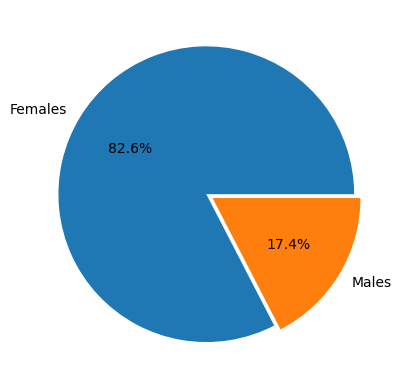

In [37]:
labels = ['Females', 'Males']
explode=[.0,.05]
sizes=data["Gender"].value_counts().values
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%')

<Axes: xlabel='Gender', ylabel='count'>

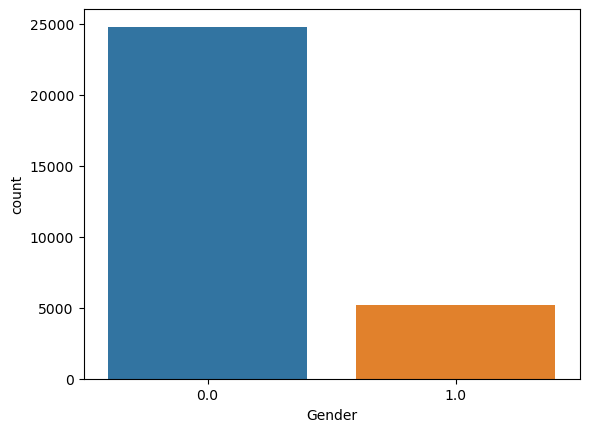

In [38]:
sns.countplot(data=data,x=data['Gender'])

# From the above 2 Graph we can see that

1) Number of females are more as compare to males.Females are with 82.6% and males are 17.4 %
2) Count of Females is approx 25000 and count of males are 5000

<Axes: xlabel='Orders', ylabel='count'>

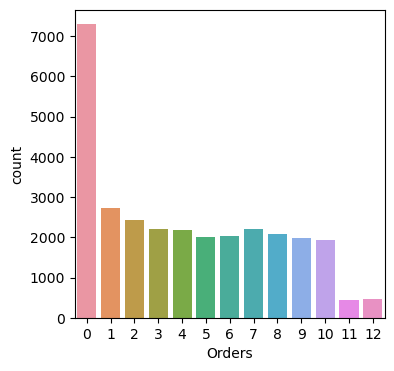

In [46]:
plt.figure(figsize=(4,4))
sns.countplot(data=data,x='Orders')

In [56]:
data.Orders.value_counts()

0     7294
1     2716
2     2422
7     2207
3     2199
4     2192
8     2080
6     2039
5     2010
9     1993
10    1938
12     469
11     441
Name: Orders, dtype: int64

In this we can se that the maximum numbers of orders are 0 which is more than 7294

<Axes: xlabel='Orders', ylabel='count'>

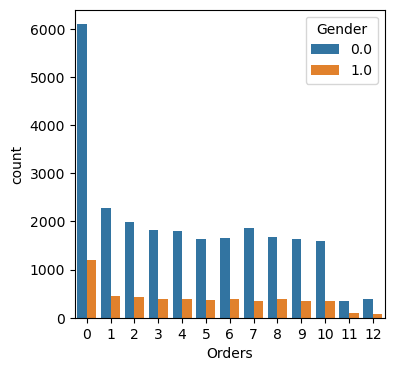

In [58]:
# Checking Who have done more Orders Male or Female
plt.figure(figsize=(4,4))
sns.countplot(data=data,x='Orders',hue='Gender')

Number of females are more who have done 0 orders which is more than 6000

In [59]:
data.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

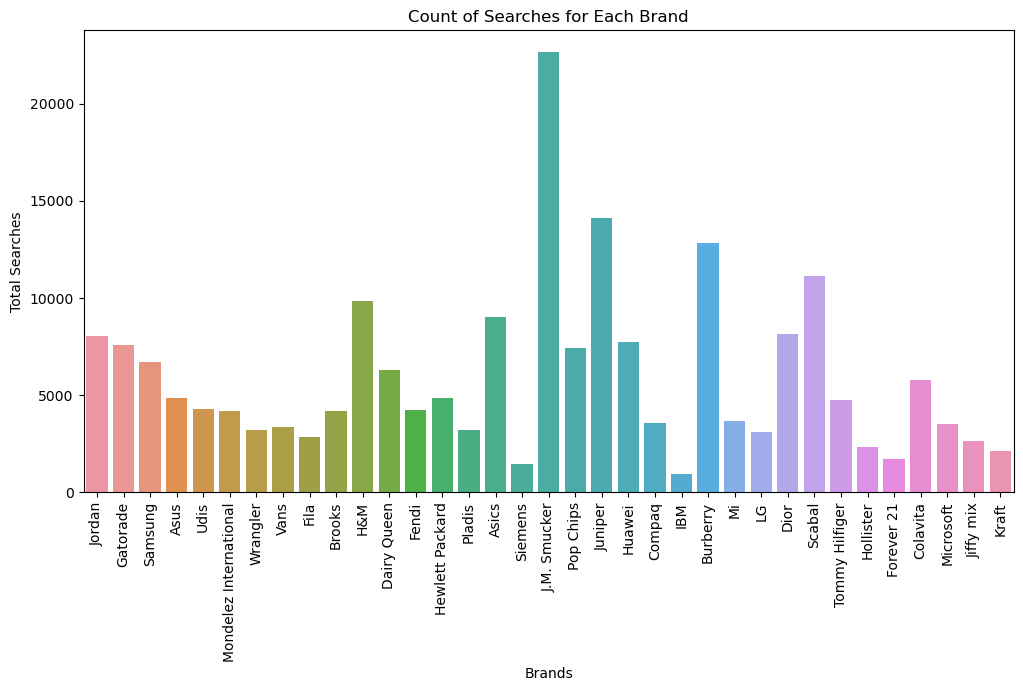

In [66]:
brand_counts = data.iloc[:, 3:].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('Total Searches')
plt.title('Count of Searches for Each Brand')
plt.show()

maximum people orders item from J.M.Smucker

# Model Building

In [67]:
from sklearn.cluster import KMeans

X = data.iloc[:, 2:] 

In [68]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=200, random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

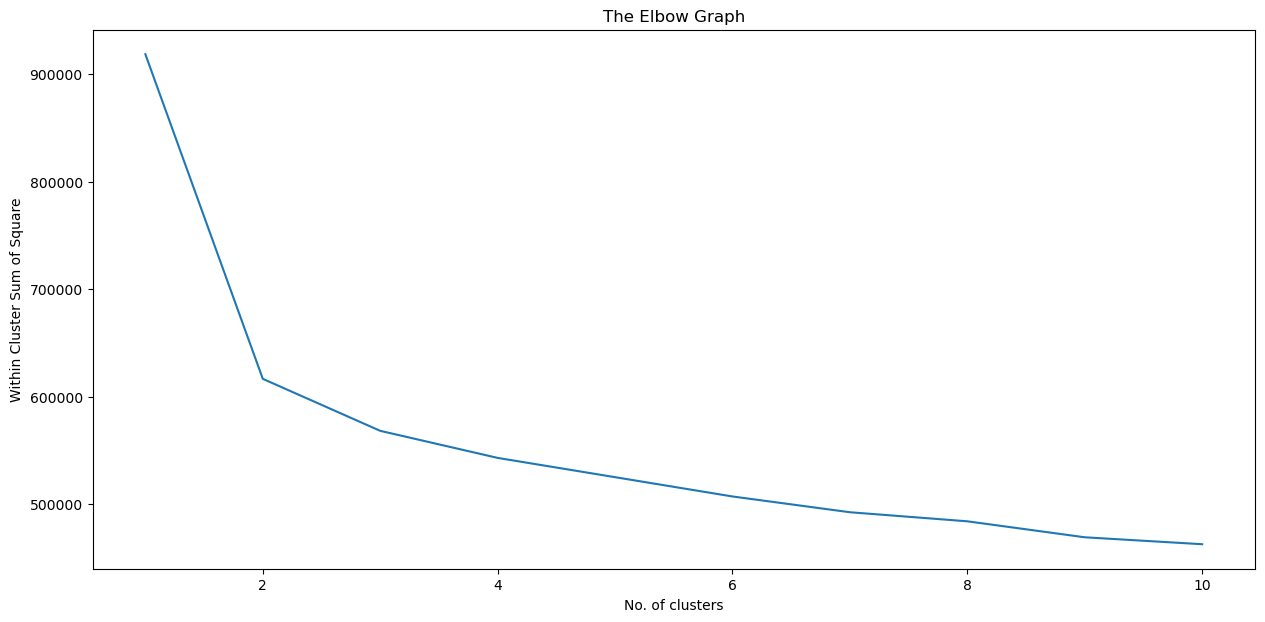

In [69]:
plt.figure(figsize = (15, 7))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Graph")
plt.xlabel("No. of clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

# Number of Cluster will be 2

In [72]:
for i in range(2,11):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
 kmeans.fit_predict(X)
 
 score = silhouette_score(X, kmeans.labels_, metric='euclidean')
 print(f'for cluster: {i} --> Silhouette Score: %.3f' % score)

for cluster: 2 --> Silhouette Score: 0.338
for cluster: 3 --> Silhouette Score: 0.203
for cluster: 4 --> Silhouette Score: 0.202
for cluster: 5 --> Silhouette Score: 0.205
for cluster: 6 --> Silhouette Score: 0.132
for cluster: 7 --> Silhouette Score: 0.133
for cluster: 8 --> Silhouette Score: 0.141
for cluster: 9 --> Silhouette Score: 0.134
for cluster: 10 --> Silhouette Score: 0.095


# Maximum Silhoutte Score is 0.338 which means there will be 2 Clusters

In [77]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 200, random_state = 42)

In [79]:
data['Cluster'] = kmeans.fit_predict(X)

In [81]:
cluster_total = data.groupby('Cluster').describe()
cluster_total

Cust_ID                                                            \
           count          mean          std  min     25%      50%      75%   
Cluster                                                                      
0        13177.0  15245.389542  8651.067073  1.0  7854.0  15328.0  22695.0   
1        16823.0  14808.684658  8663.123776  2.0  7259.0  14707.0  22347.5   

                   Gender            ... Jiffy mix         Kraft            \
             max    count      mean  ...       75%  max    count      mean   
Cluster                              ...                                     
0        29993.0  13177.0  0.180845  ...       0.0  8.0  13177.0  0.067466   
1        30000.0  16823.0  0.168757  ...       0.0  8.0  16823.0  0.073590   

                                             
              std  min  25%  50%  75%   max  
Cluster                                      
0        0.396844  0.0  0.0  0.0  0.0  16.0  
1        0.380766  0.0  0.0  0.0  0.0   6.0  

[2 rows x 304 columns]

<Axes: xlabel='Cluster', ylabel='Orders'>

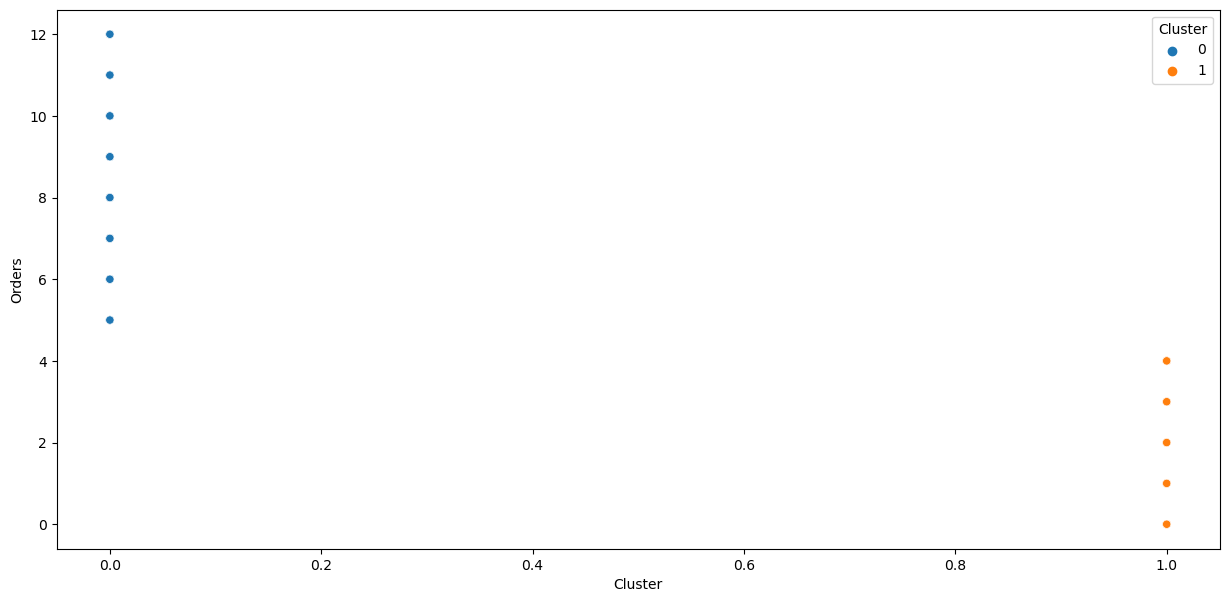

In [82]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Cluster', y='Orders', hue='Cluster', data=data)

In [85]:
cluster_total = {0: 'Low_Volume_Customer', 1: 'High_Volume_Customers'}

data['Cluster_total'] = data['Cluster'].map(cluster_total)

print(data[['Cust_ID', 'Cluster', 'Cluster_total']].head())

   Cust_ID  Cluster          Cluster_total
0        1        0    Low_Volume_Customer
1        2        1  High_Volume_Customers
2        3        0    Low_Volume_Customer
3        4        1  High_Volume_Customers
4        5        0    Low_Volume_Customer


# Model Interpretation


## The segmentation model has find two distinct customer segments:

### Low_Volume_Customers:
* This group consists people with smaller orders.

### High-Volume Customers:
* This group consists of people largerer orders.